In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [28]:
data = pd.read_csv("met_data.csv")

In [29]:
data

,DATE,RAINFALL (mm),Max Temp (°C),Min Temp (°C),Mean Temp (°C),Soil Temp @ 50cm (°C),Sunshine Hours,Evaporation (mm)
0,2014-01-01,NaN,34.0,23.0,28.5,30.50,7.20,4.00
1,2014-01-02,NaN,35.0,24.0,29.5,30.00,6.60,4.00
2,2014-01-03,NaN,32.0,23.0,27.5,30.50,7.20,6.00
3,2014-01-04,NaN,33.0,21.0,27.0,30.50,6.10,4.00
4,2014-01-05,NaN,31.5,22.0,26.8,30.50,7.30,4.00
...,...,...,...,...,...,...,...,...
3647,2023-12-27,NaN,30.0,21.0,25.5,NaN,4.20,3.40
3648,2023-12-28,NaN,31.0,22.0,26.5,NaN,5.50,4.10
3649,2023-12-29,NaN,32.0,22.0,27.0,NaN,5.70,3.80
3650,2023-12-30,NaN,32.0,21.0,26.5,NaN,4.10,3.20


In [30]:
if 'DATE' in data.columns:
    data['DATE'] = pd.to_datetime(data['DATE'], format="%Y-%m-%d")


In [31]:
if 'DATE' in data.columns:
    data['year'] = data['DATE'].dt.year
    data['month'] = data['DATE'].dt.month
    data['day'] = data['DATE'].dt.day

In [32]:
data

,DATE,RAINFALL (mm),Max Temp (°C),Min Temp (°C),Mean Temp (°C),Soil Temp @ 50cm (°C),Sunshine Hours,Evaporation (mm),year,month,day
0,2014-01-01,NaN,34.0,23.0,28.5,30.50,7.20,4.00,2014,1,1
1,2014-01-02,NaN,35.0,24.0,29.5,30.00,6.60,4.00,2014,1,2
2,2014-01-03,NaN,32.0,23.0,27.5,30.50,7.20,6.00,2014,1,3
3,2014-01-04,NaN,33.0,21.0,27.0,30.50,6.10,4.00,2014,1,4
4,2014-01-05,NaN,31.5,22.0,26.8,30.50,7.30,4.00,2014,1,5
...,...,...,...,...,...,...,...,...,...,...,...
3647,2023-12-27,NaN,30.0,21.0,25.5,NaN,4.20,3.40,2023,12,27
3648,2023-12-28,NaN,31.0,22.0,26.5,NaN,5.50,4.10,2023,12,28
3649,2023-12-29,NaN,32.0,22.0,27.0,NaN,5.70,3.80,2023,12,29
3650,2023-12-30,NaN,32.0,21.0,26.5,NaN,4.10,3.20,2023,12,30


In [33]:
%pip install prophet


<Axes: xlabel='DATE'>

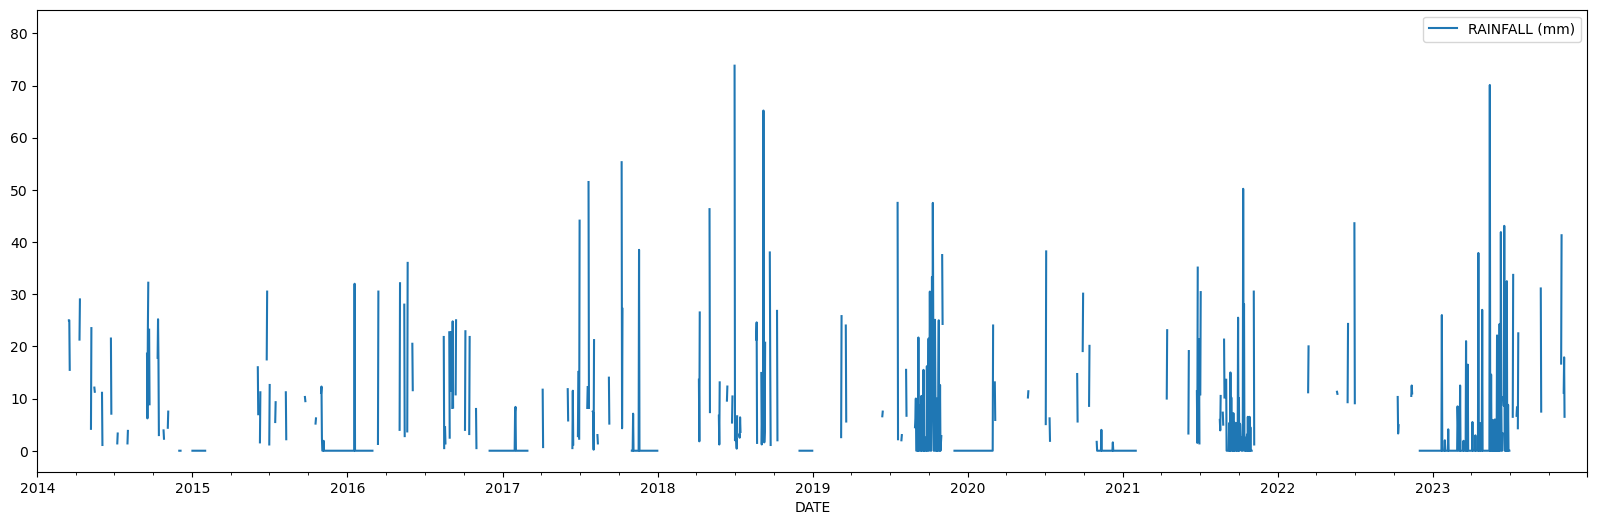

In [48]:
data['RAINFALL (mm)'] = pd.to_numeric(data['RAINFALL (mm)'], errors='coerce')
data.plot(x='DATE', y='RAINFALL (mm)', figsize=(20,6))


In [53]:
#check data shape
(data.shape)

(3652, 11)

In [55]:
(data.columns)



Index(['DATE', 'RAINFALL (mm)', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Soil Temp @ 50cm (°C) ', 'Sunshine Hours',
       'Evaporation (mm)', 'year', 'month', 'day'],
      dtype='object')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    3652 non-null   datetime64[ns]
 1   RAINFALL (mm)           1512 non-null   float64       
 2   Max Temp (°C)           3652 non-null   float64       
 3   Min Temp (°C)           3652 non-null   float64       
 4   Mean Temp (°C)          3652 non-null   float64       
 5   Soil Temp @ 50cm (°C)   2191 non-null   object        
 6   Sunshine Hours          3652 non-null   object        
 7   Evaporation (mm)        3501 non-null   object        
 8   year                    3652 non-null   int32         
 9   month                   3652 non-null   int32         
 10  day                     3652 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), object(3)
memory usage: 271.2+ KB


In [65]:
#check missing values
data.isna().sum()

DATE                         0
RAINFALL (mm)                0
Max Temp (°C)                0
Min Temp (°C)                0
Mean Temp (°C)               0
Soil Temp @ 50cm (°C)     1461
Sunshine Hours               0
Evaporation (mm)           151
year                         0
month                        0
day                          0
dtype: int64

In [63]:
#replaced missing values with 0 in RAINFALL (mm) column 
data['RAINFALL (mm)'] = data['RAINFALL (mm)'].fillna(0)